<a href="https://colab.research.google.com/github/zainulabidin73622/DEEP_LEARNING/blob/main/EXP%233simple_222_mtp_forward_backward_propagation_error_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
A1 = np.array([[0.05], [0.10]])
W2 = np.array([[0.15, 0.20], [0.25, 0.30]])
W3 = np.array([[0.40, 0.45], [0.50, 0.55]])
b2 = np.array([[0.35], [0.35]])
b3 = np.array([[0.60], [0.60]])

# Given R vector
R = np.array([[0.01], [0.99]])

# Learning rate
alpha = 0.3

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Number of epochs
epochs = 25

# Initialize an array to store total errors
errors = np.zeros(epochs)

# Loop through epochs
for epoch in range(epochs):
    # Forward pass calculations
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    # Calculate Deltas
    D3 = (A3 - R) * sigmoid_derivative(Z3)
    D2 = np.dot(W3.T, D3) * sigmoid_derivative(Z2)

    # Calculate gradients
    grad_W3 = np.dot(D3, A2.T)
    grad_b3 = D3
    grad_W2 = np.dot(D2, A1.T)
    grad_b2 = D2

    # Update weights and biases
    W2 = W2 - alpha * grad_W2
    b2 = b2 - alpha * grad_b2

    W3 = W3 - alpha * grad_W3
    b3 = b3 - alpha * grad_b3

    # Calculate total error and store in array
    total_error = np.sum((A3 - R) ** 2) / 2
    errors[epoch] = total_error

    # Print values for each epoch
    print(f"Epoch {epoch + 1}:")
    print("A2:", A2)
    print("A3:", A3)
    print("Z2:", Z2)
    print("Z3:", Z3)
    print("D2:", D2)
    print("D3:", D3)
    print("W2:", W2)
    print("W3:", W3)
    print("b2:", b2)
    print("b3:", b3)
    print("-" * 40)



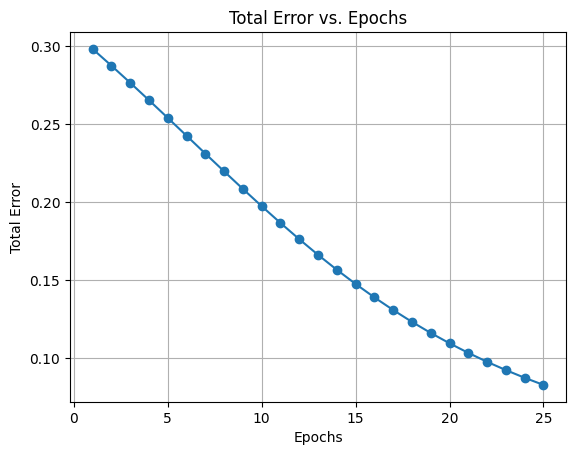

In [ ]:
# Plot the graph of total errors
plt.figure()
plt.plot(range(1, epochs + 1), errors, '-o')
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.title('Total Error vs. Epochs')
plt.grid(True)
plt.show()